# Loading the data

In [36]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
from google.cloud import bigquery     # If you are working locally, make sure you have Google Cloud library installed
import pandas as pd
from google.oauth2 import service_account


import pyarrow.parquet as pq

In [3]:
# Connect to BQ


credentials = service_account.Credentials.from_service_account_file(
'/Users/mariegeorgescudehillerin/Desktop/Le Wagon/Project/music-recommendation-system-24-e7b0bc87bbb3.json')
# music-recommendation-system-24-3d0d21fb1f8b.json is the service account JSON file. Save the file locally on your device and add the path here.
# make sure that the slashes in the path are '/' and not '\'


project_id = 'music-recommendation-system-24'
client = bigquery.Client(credentials= credentials,project=project_id)

In [4]:
# Query BQ


query_job = client.query("""
  SELECT
     *
  FROM `music-recommendation-system-24.obama_playlists.barack_obamas_playlist_2019-2024_clean_enriched_V0_csv`
  LIMIT 1000""")
#but the query in three quote marks




results = query_job.result() # Wait for the job to complete.


rows = [dict(row) for row in results]


# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

#Data Exploration

In [5]:
df.shape

(259, 26)

In [6]:
print(df.columns)

Index(['track_id', 'track_name', 'track_album_name', 'track_artist',
       'artist_id', 'artist_followers', 'artist_popularity', 'artist_gender',
       'track_album_release_year', 'duration_min', 'track_popularity',
       'genres', 'record_label', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'Playlist_year'],
      dtype='object')


In [7]:
pd.DataFrame(df.columns, columns=["Column Names"])

,Column Names
0,track_id
1,track_name
2,track_album_name
3,track_artist
4,artist_id
5,artist_followers
6,artist_popularity
7,artist_gender
8,track_album_release_year
9,duration_min


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  259 non-null    object 
 1   track_name                259 non-null    object 
 2   track_album_name          259 non-null    object 
 3   track_artist              259 non-null    object 
 4   artist_id                 178 non-null    object 
 5   artist_followers          178 non-null    float64
 6   artist_popularity         178 non-null    float64
 7   artist_gender             259 non-null    object 
 8   track_album_release_year  259 non-null    object 
 9   duration_min              259 non-null    float64
 10  track_popularity          259 non-null    int64  
 11  genres                    259 non-null    object 
 12  record_label              259 non-null    object 
 13  danceability              259 non-null    float64
 14  energy    

In [21]:
df["track_album_release_year"] = df["track_album_release_year"].str.replace(r'\D', '', regex=True).astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  259 non-null    object 
 1   track_name                259 non-null    object 
 2   track_album_name          259 non-null    object 
 3   track_artist              259 non-null    object 
 4   artist_id                 178 non-null    object 
 5   artist_followers          178 non-null    float64
 6   artist_popularity         178 non-null    float64
 7   artist_gender             259 non-null    object 
 8   track_album_release_year  259 non-null    int64  
 9   duration_min              259 non-null    float64
 10  track_popularity          259 non-null    int64  
 11  genres                    259 non-null    object 
 12  record_label              259 non-null    object 
 13  danceability              259 non-null    float64
 14  energy    

In [22]:
df.head()

,track_id,track_name,track_album_name,track_artist,artist_id,artist_followers,artist_popularity,artist_gender,track_album_release_year,duration_min,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Playlist_year
0,0TK2YIli7K1leLovkQiNik,Señorita,Señorita,"Shawn Mendes,Camila Cabello",7n2wHs1TKAczGzO7Dd2rGr,43549778.0,84.0,N/A,2019,3.18,...,-6.04,minor,3.0,4.0,0.0,9.0,75.0,117,4,2019
1,6bTORCskFVRlnHXbVgnKEe,Can U Believe,The Evolution of Robin Thicke,Robin Thicke,0ZrpamOxcZybMHGg1AYtHP,1949996.0,64.0,M,2006,4.87,...,-7.77,Major,3.0,46.0,0.0,14.0,35.0,82,4,2019
2,2qG5sZ7Si6sdK74qLxedYM,Con Altura,Con Altura,"ROSALÍA,J Balvin,El Guincho",7ltDVBr6mKbRvohxheJ9h1,8366818.0,82.0,N/A,2019,2.69,...,-4.03,Major,12.0,39.0,0.0,5.0,75.0,98,4,2019
3,53w2vsCVLYmgh15RhIwWsw,Float,Comin' From Where I'm From,Anthony Hamilton,2DzRMyWgjuMbYvt5BLbpCo,1593940.0,60.0,M,2003,5.69,...,-7.57,Major,4.0,14.0,0.0,37.0,39.0,113,3,2019
4,6Ic2MP2hzoBLe3r1VIle8J,Joke Ting (feat. Ari PenSmith),Diaspora,"GoldLink,Ari PenSmith",5XenQ7XfcvQdfIbpLEFaKQ,908716.0,66.0,M,2019,3.00,...,-5.40,minor,4.0,19.0,0.0,9.0,72.0,140,4,2019


#Data cleaning

In [10]:
duplicates = df.duplicated()

In [12]:
print(duplicates.sum())

0


In [14]:
df.isnull().sum()

track_id                     0
track_name                   0
track_album_name             0
track_artist                 0
artist_id                   81
artist_followers            81
artist_popularity           81
artist_gender                0
track_album_release_year     0
duration_min                 0
track_popularity             0
genres                       0
record_label                 0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature               0
Playlist_year                0
dtype: int64

#Obama´s Taste Exploration

#Data visualization

In [15]:
sorted_counts = df["genres"].value_counts().sort_values(ascending=False)
sorted_genres = sorted_counts.index.tolist()

fig = px.bar(df, x="genres", title="genres Count",
             category_orders={"genres": sorted_genres})
fig.show()

##Artists

In [16]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(20)

,track_id,track_name,track_album_name,artist_id,artist_followers,artist_popularity,artist_gender,track_album_release_year,duration_min,track_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Playlist_year
track_artist,,,,,,,,,,,,,,,,,,,,,
Bob Dylan,4,4,4,2,2,2,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Stevie Wonder,4,4,4,3,3,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
The Rolling Stones,4,4,4,2,2,2,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Beyoncé,3,3,3,2,2,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Bob Marley & The Wailers,3,3,3,1,1,1,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Otis Redding,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Maggie Rogers,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
SZA,3,3,3,2,2,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
H.E.R.,2,2,2,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


##Release Year

In [17]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_name", ascending=False)

,track_id,track_name,track_album_name,track_artist,artist_id,artist_followers,artist_popularity,artist_gender,duration_min,track_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Playlist_year
track_album_release_year,,,,,,,,,,,,,,,,,,,,,
2 020,32,32,32,32,28,28,28,32,32,32,...,32,32,32,32,32,32,32,32,32,32
2 019,23,23,23,23,20,20,20,23,23,23,...,23,23,23,23,23,23,23,23,23,23
2 023,21,21,21,21,15,15,15,21,21,21,...,21,21,21,21,21,21,21,21,21,21
2 022,19,19,19,19,18,18,18,19,19,19,...,19,19,19,19,19,19,19,19,19,19
2 024,18,18,18,18,0,0,0,18,18,18,...,18,18,18,18,18,18,18,18,18,18
2 021,14,14,14,14,4,4,4,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1 967,8,8,8,8,6,6,6,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2 017,7,7,7,7,6,6,6,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2 016,7,7,7,7,5,5,5,7,7,7,...,7,7,7,7,7,7,7,7,7,7


Which music era does Obama prefer?

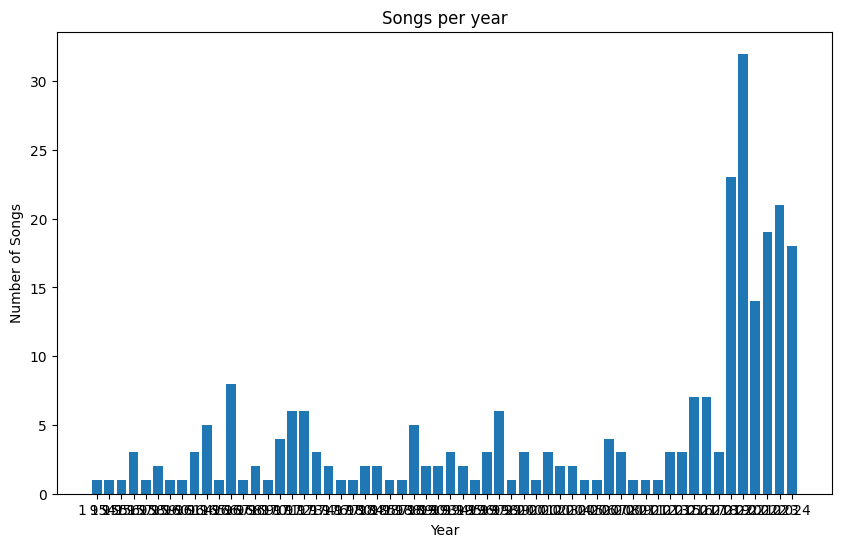

In [18]:
#visualize number of songs (track_name) per year
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_year.index, grouped_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per year');


In [24]:
print(df["track_album_release_year"].min())

1954


In [25]:
print(df["track_album_release_year"].max())

2024


the playlists are from 2019-2023 and the majority of the songs also seem to be within this time frame. At first glance, it looks like the playlists are supposed to be relevant for the respective years

##Popularity

In [26]:
artist_popularity = df.groupby("track_artist")["artist_popularity"].mean()
artist_popularity.sort_values(ascending=False).head(20)

track_artist
Billie Eilish                                   96.0
Drake,Rihanna                                   96.0
Bad Bunny,Bomba Estéreo                         95.0
Yng Lvcas,Peso Pluma                            93.0
Rihanna                                         92.0
Kendrick Lamar,Blxst,Amanda Reifer              92.0
SZA                                             90.0
J Balvin,Dua Lipa,Bad Bunny,Tainy               88.0
Luke Combs                                      87.0
Beyoncé                                         87.0
Daniel Caesar                                   86.0
Khalid,Disclosure,Davido,Tems                   85.0
JAY-Z,Beyoncé,Childish Gambino,Oumou Sangaré    85.0
Harry Styles                                    85.0
Megan Thee Stallion,Beyoncé                     84.0
Summer Walker,PARTYNEXTDOOR                     84.0
PARTYNEXTDOOR                                   84.0
Shawn Mendes,Camila Cabello                     84.0
Mac Miller                       

In [27]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

track_name
MILLION DOLLAR BABY                             90.0
Stargazing                                      89.0
CHIHIRO                                         88.0
A Bar Song (Tipsy)                              88.0
PERRO NEGRO                                     85.0
Snooze                                          85.0
i like the way you kiss me                      85.0
Best Part (feat. H.E.R.)                        84.0
Brown Eyed Girl                                 83.0
Dancing In the Dark                             82.0
Fast Car                                        82.0
La Bebe - Remix                                 81.0
Ojitos Lindos                                   81.0
Could You Be Loved                              80.0
365                                             80.0
Lil Boo Thang                                   79.0
California Love - Original Version              79.0
(Sittin' On) the Dock of the Bay                78.0
Work                               

In [28]:
print("Average Track Popularity: ", track_popularity.mean())
print("Median Track Popularity: ", track_popularity.median())
print("Max Track Popularity: ", track_popularity.max())
print("Min Track Popularity: ", track_popularity.min())

Average Track Popularity:  47.31782945736434
Median Track Popularity:  50.0
Max Track Popularity:  90.0
Min Track Popularity:  0.0


In [29]:
print("Average Artist Popularity: ", artist_popularity.mean())
print("Median Artist Popularity: ", artist_popularity.median())
print("Max Artist Popularity: ", artist_popularity.max())
print("Min Artist Popularity: ", artist_popularity.min())

Average Artist Popularity:  66.52866242038216
Median Artist Popularity:  67.0
Max Artist Popularity:  96.0
Min Artist Popularity:  0.0


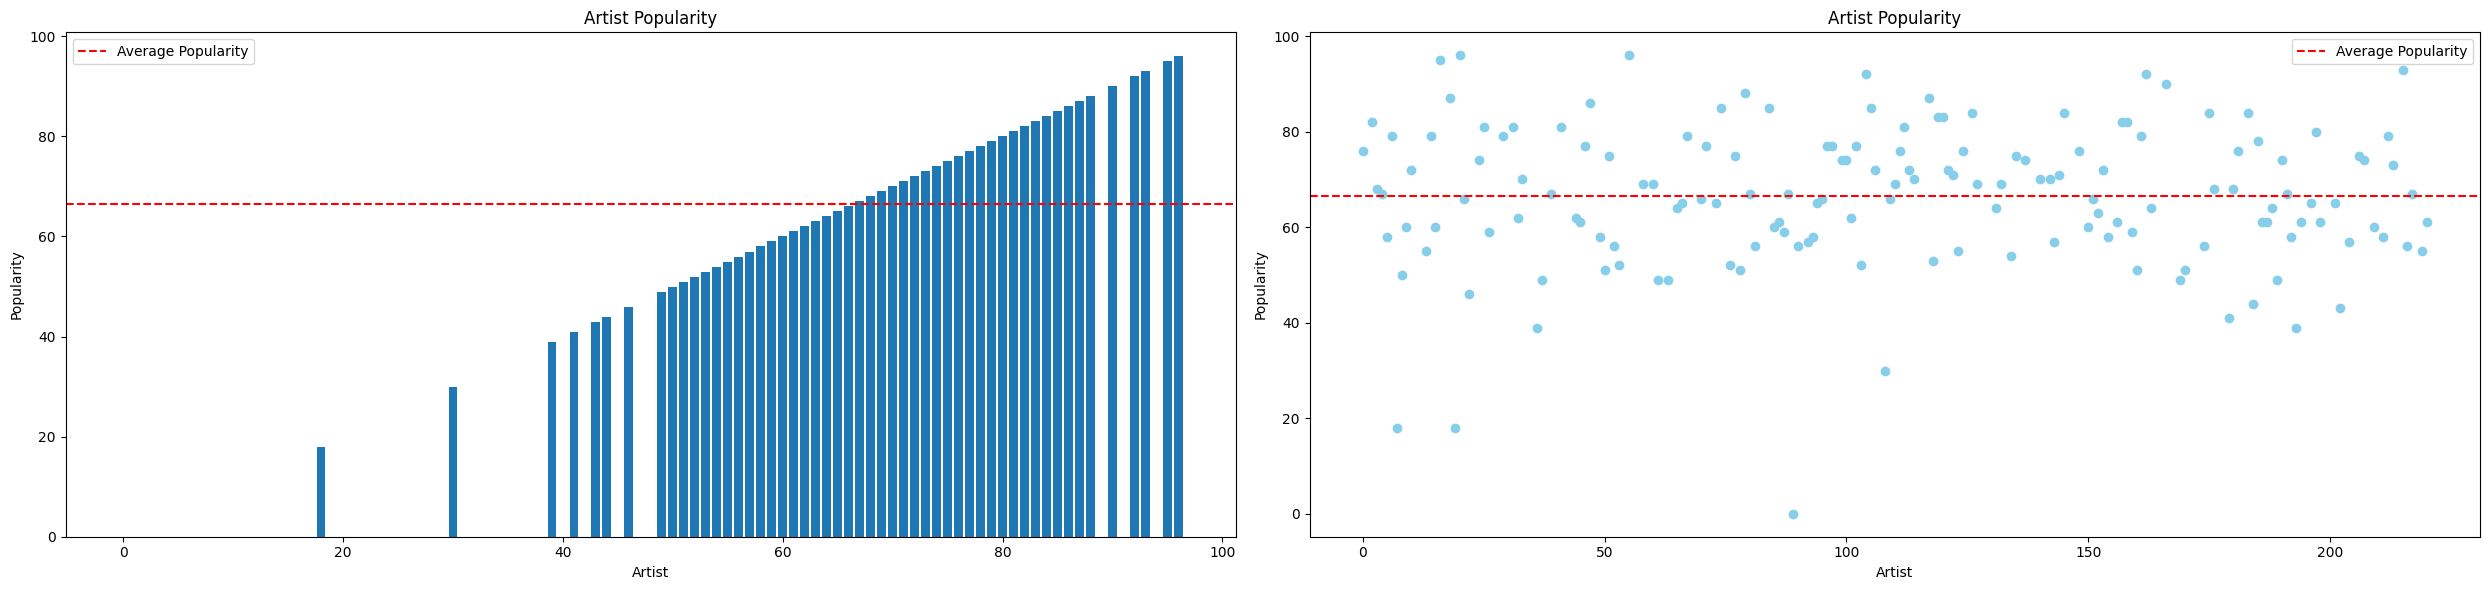

In [30]:
# Set up the figure for Artist Popularity with two subplots (barplot and scatterplot) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Bar Plot on the first subplot
ax1.bar(artist_popularity, artist_popularity, color='#1f77b4')
ax1.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax1.set_xlabel('Artist')
ax1.set_ylabel('Popularity')
ax1.set_title('Artist Popularity')
ax1.legend()

# Scatter Plot on the second subplot
ax2.scatter(range(len(artist_popularity)), artist_popularity, color='skyblue')
ax2.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Popularity')
ax2.set_title('Artist Popularity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

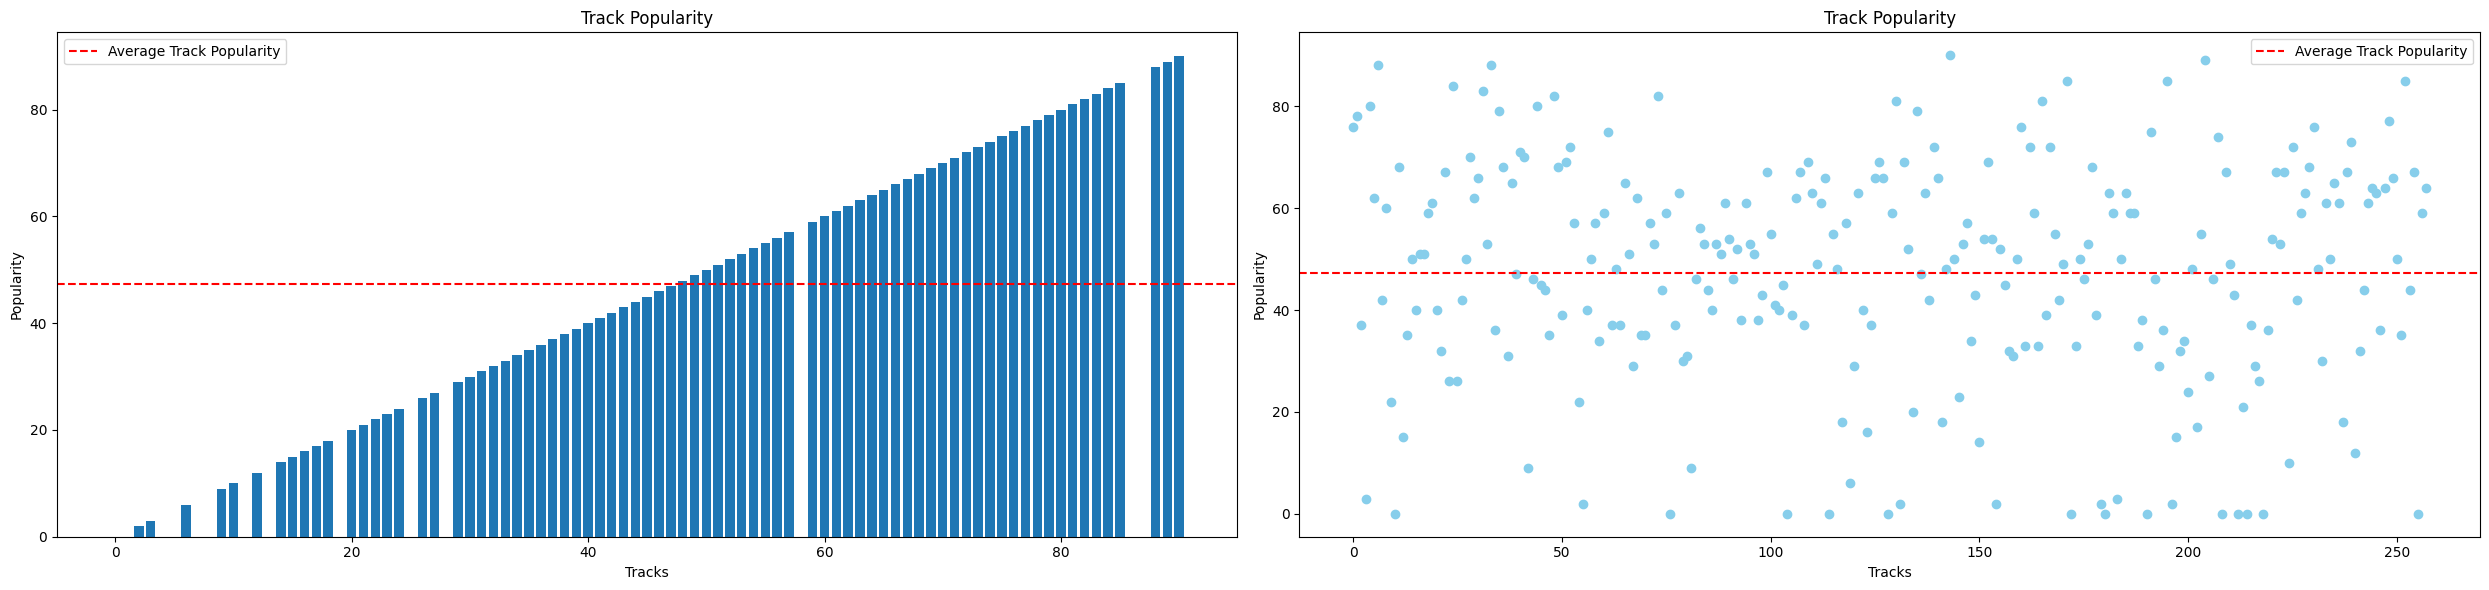

In [31]:
# Set up the figure for Track Popularity with two subplots (barplot and scatterplot) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Bar Plot on the first subplot
ax1.bar(track_popularity, track_popularity, color='#1f77b4')
ax1.axhline(y=track_popularity.mean(), color='red', linestyle='--', label='Average Track Popularity')
ax1.set_xlabel('Tracks')
ax1.set_ylabel('Popularity')
ax1.set_title('Track Popularity')
ax1.legend()

# Scatter Plot on the second subplot
ax2.scatter(range(len(track_popularity)), track_popularity, color='skyblue')
ax2.axhline(y=track_popularity.mean(), color='red', linestyle='--', label='Average Track Popularity')
ax2.set_xlabel('Tracks')
ax2.set_ylabel('Popularity')
ax2.set_title('Track Popularity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

##Track Duration

Does Obama prefer short or long songs?

In [52]:
print("The average song duration is",math.floor(df["duration_min"].mean()),"minutes and", int((df["duration_min"].mean()-math.floor(df["duration_min"].mean()))*60), "seconds.")
print("The median song duration is",math.floor(df["duration_min"].median()),"minutes and", int((df["duration_min"].median()-math.floor(df["duration_min"].median()))*60), "seconds.")
print("The shortest song lasts",math.floor(df["duration_min"].min()),"minutes and", int((df["duration_min"].min()-math.floor(df["duration_min"].min()))*60), "seconds.")
print("The shortest song lasts",math.floor(df["duration_min"].max()),"minutes and", int((df["duration_min"].max()-math.floor(df["duration_min"].max()))*60), "seconds.")


The average song duration is 3 minutes and 50 seconds.
The median song duration is 3 minutes and 40 seconds.
The shortest song lasts 1 minutes and 16 seconds.
The shortest song lasts 13 minutes and 26 seconds.


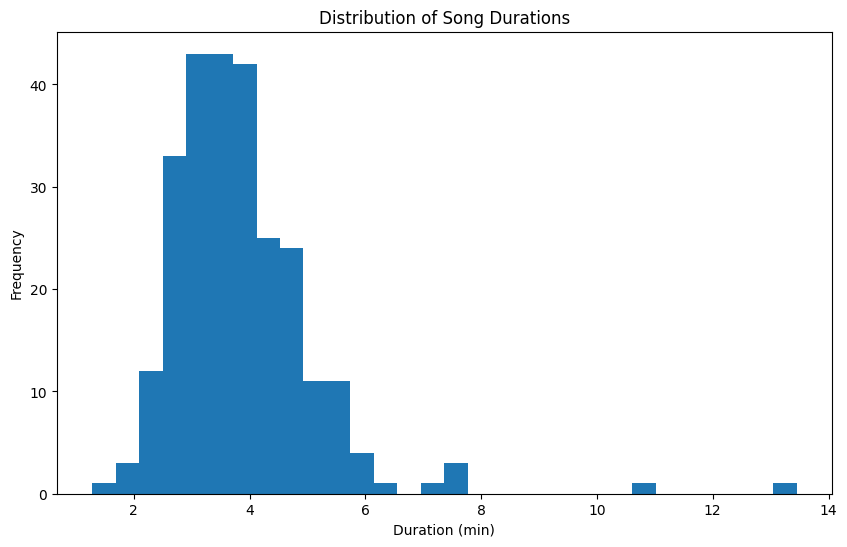

In [53]:
#histogram of duration of songs
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=30, color='#1f77b4')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

##Music Features

In [54]:
print(df["danceability"].mean())

64.27953667953669


In [55]:
print(df["loudness"].mean())

-8.332393822393822


In [56]:
print(df["valence"].mean())

56.48440154440154


In [57]:
print(df["time_signature"].value_counts())

time_signature
4    230
3     25
1      3
5      1
Name: count, dtype: int64


In [58]:
print(df["mode"].value_counts())

mode
Major    154
minor     92
Minor     13
Name: count, dtype: int64


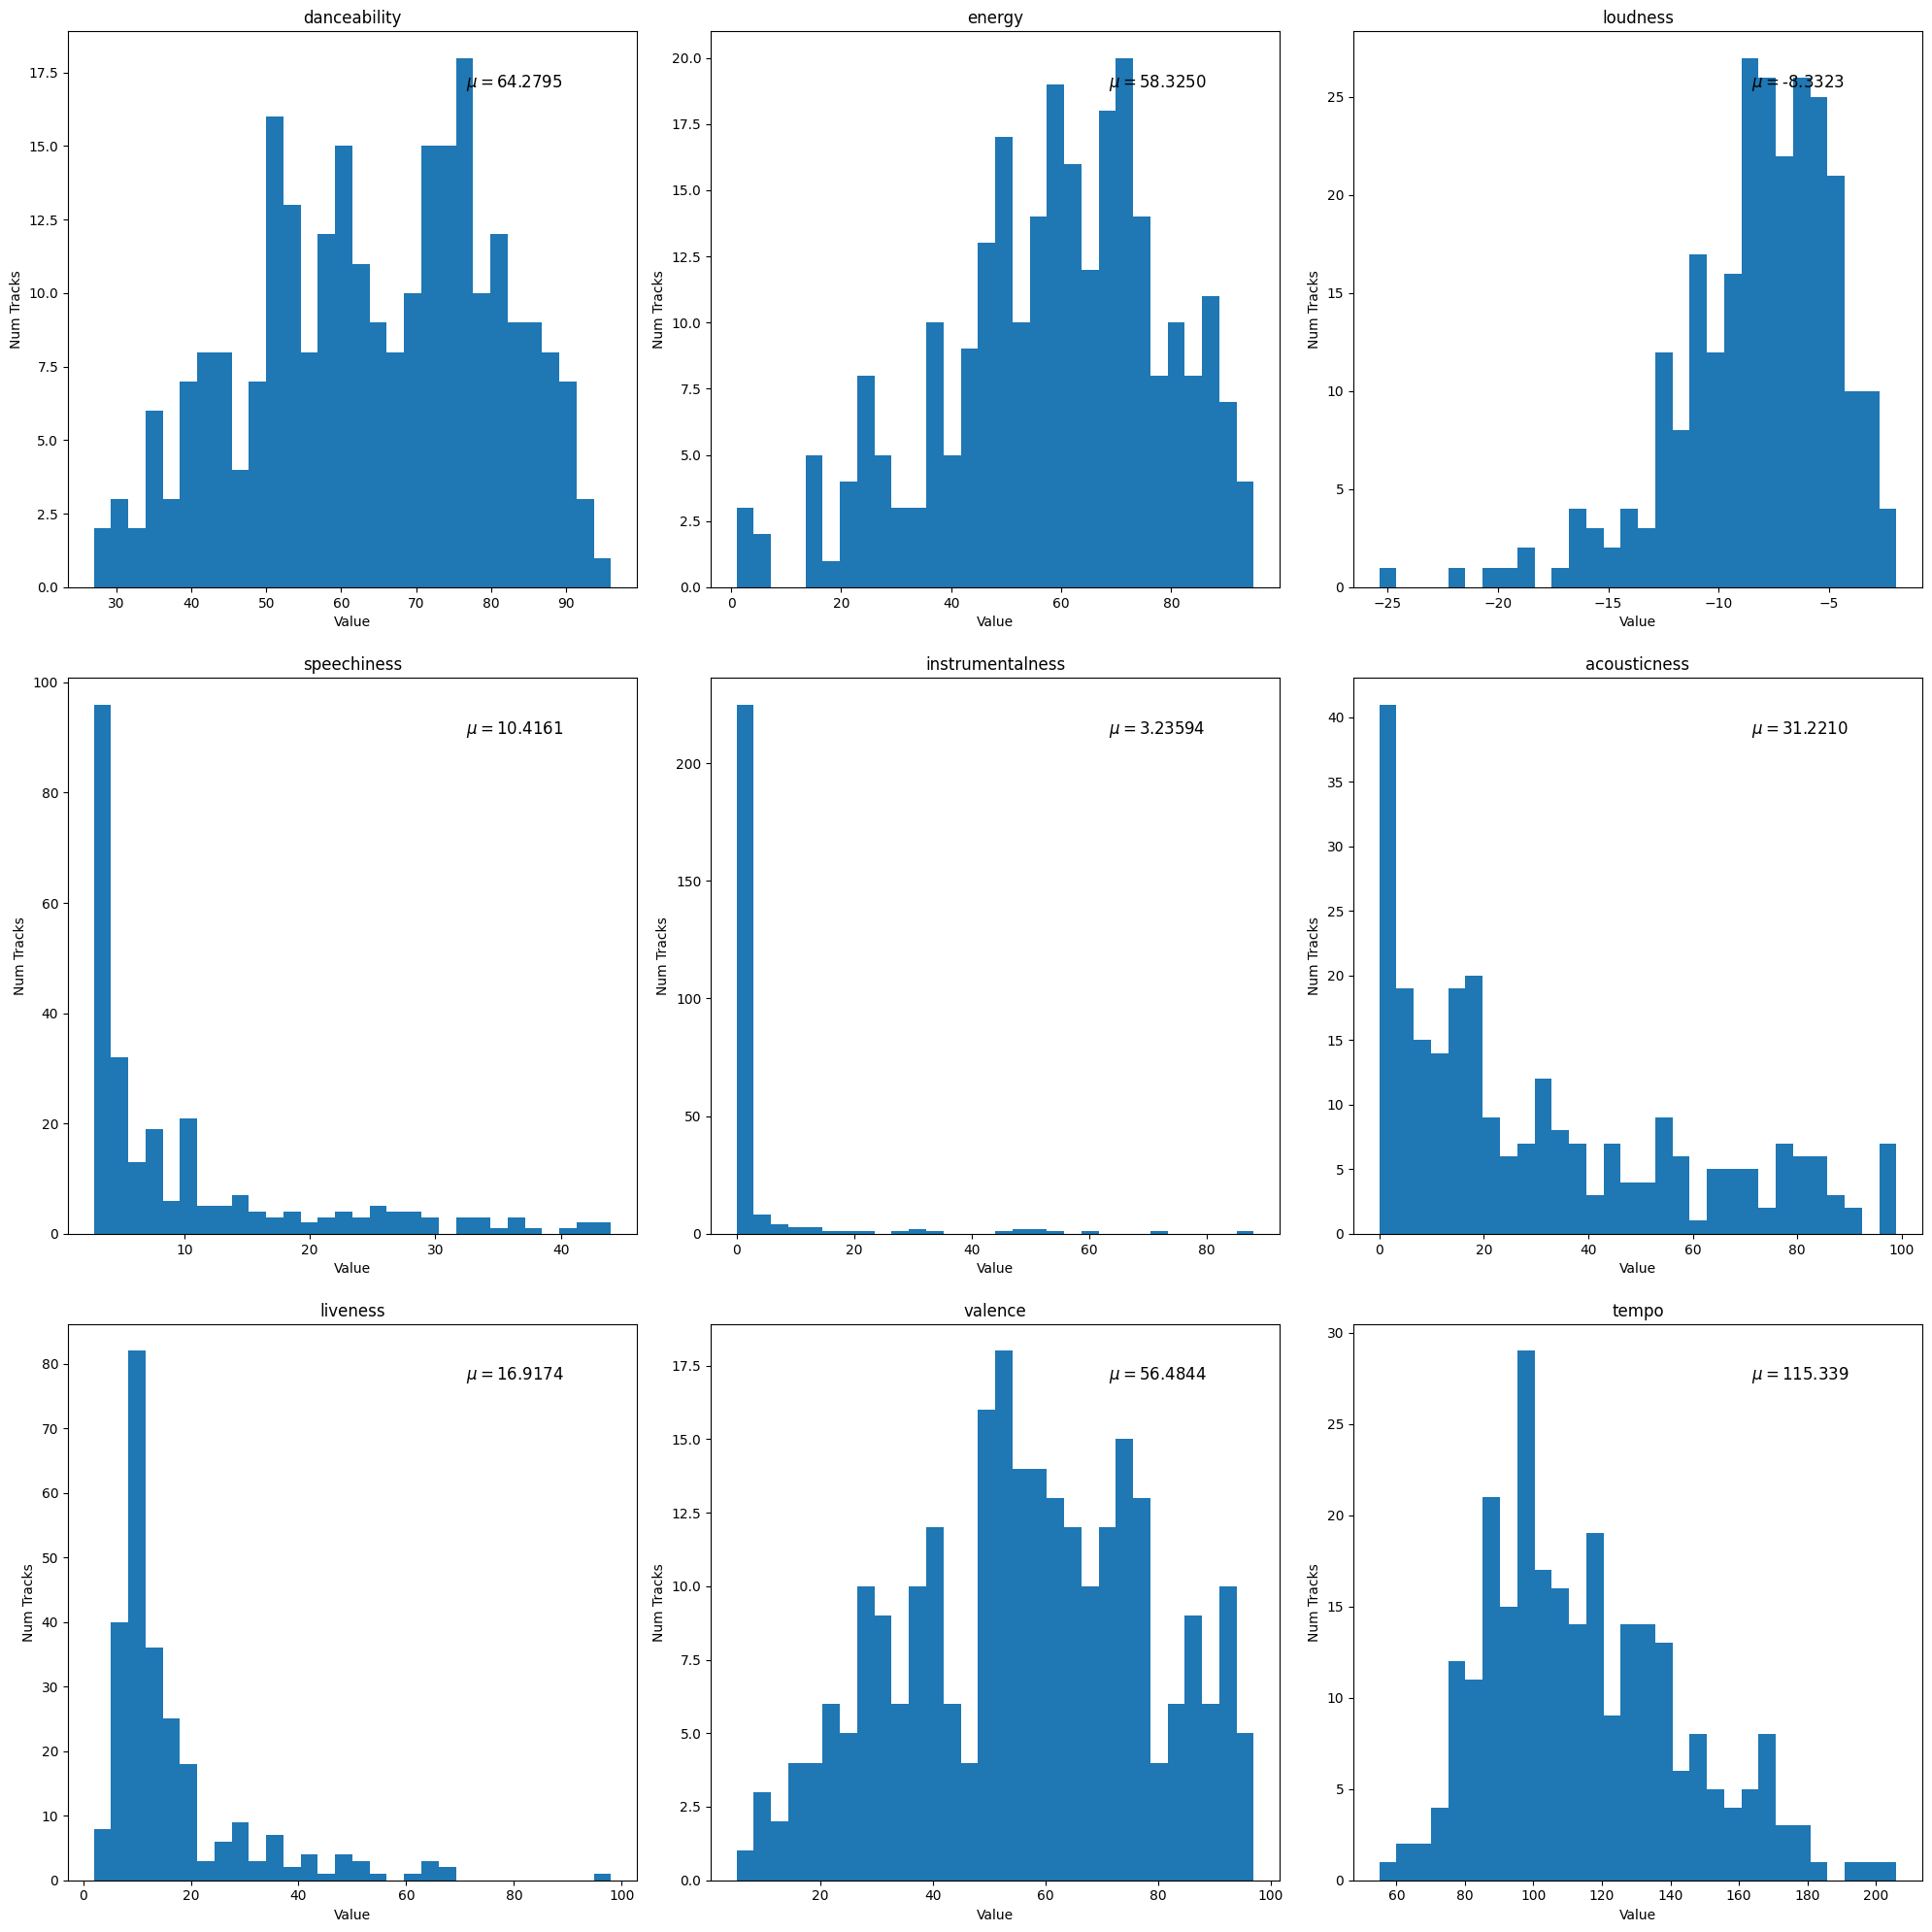

In [59]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
                plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)

plt.tight_layout(h_pad=2)

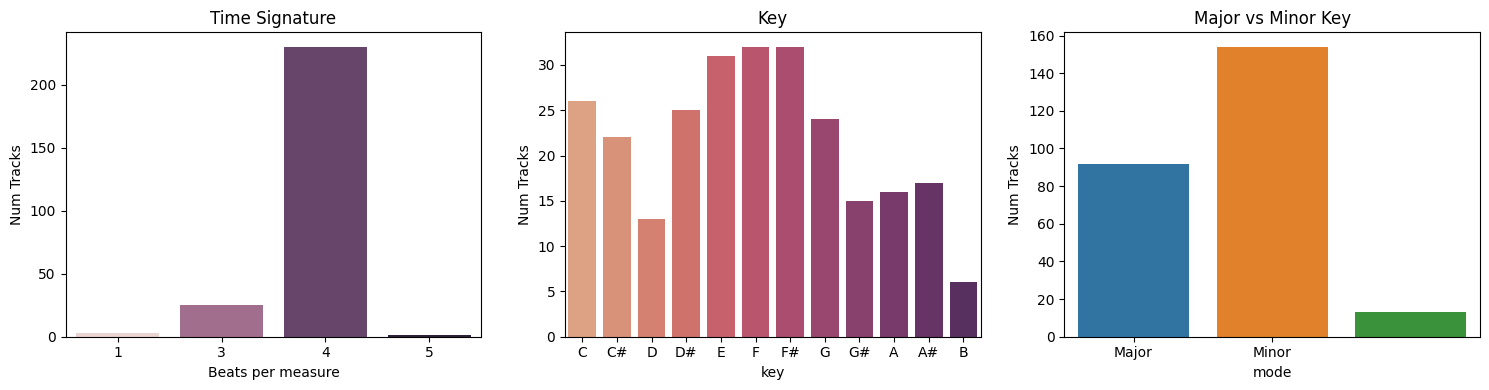

In [60]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(df, x='time_signature', hue='time_signature', legend=False)
plt.xlabel('Beats per measure')
plt.ylabel('Num Tracks')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
sns.countplot(df, x='key', hue='key', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('Key')

plt.subplot(1, 3, 3)
sns.countplot(df, x='mode', hue='mode', legend=False)
plt.xticks(ticks=[0, 1], labels=['Major', 'Minor'])  # Set ticks to match labels
plt.ylabel('Num Tracks')
plt.title('Major vs Minor Key')

plt.tight_layout(w_pad=2)

the vast majority of the tracks are in 4/4 time signature but interestingly enough the majority of the tracks are in G major, A major and D minor. About 2/3 of the tracks are in minor key. Maybe this is the reason for a relatively balanced valence of 0,56? Tracks in B major are obviously not very attractive to Obama.
